<a href="https://colab.research.google.com/github/NNATuna/ML-DL/blob/main/Basic/Convolutional_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=24503ecfa32cdb8738042f6314d77e06b9162f8f0b623fba9f155e533d397793
  Stored in directory: /root/.cache/pip/wheels/01/46/3b/e29ffbe4ebe614ff224bad40fc6a5773a67a163251585a13a9
Successfully built wget


In [49]:
wget.download('https://printables.space/files/uploads/download-and-print/chessboard/printable-chess-board.jpg')


'printable-chess-board.jpg'

sample_data/


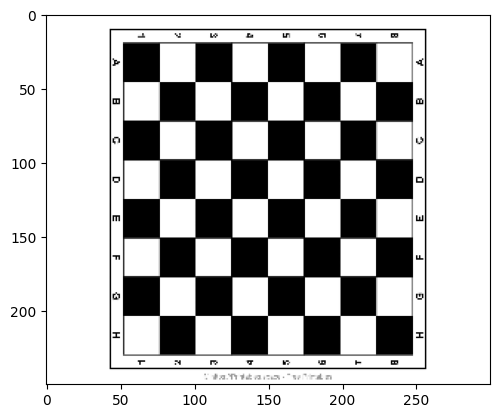

In [61]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('printable-chess-board.jpg')
image = cv2.resize(image, (300, 250))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

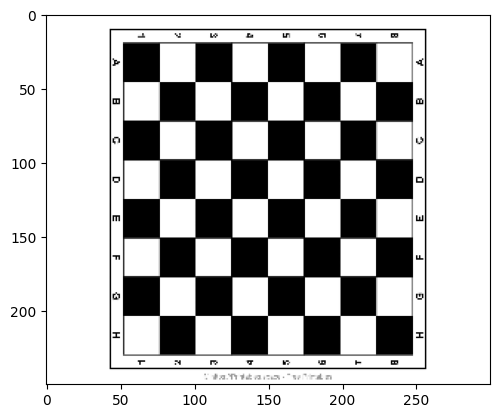

In [63]:
import matplotlib.pyplot as plt
gray_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.gray()
plt.imshow(gray_img)

In [64]:
gray_img
gray_img.shape

(250, 300)

In [65]:
sobelX = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1] ]
sobelY = [ [1, 2, 1], [0, 0, 0], [-1, -2, -1] ]

In [66]:
def getCoord(kernel):
  center_filter = [1, 1]
  xRows = [0, 0, 1, -1, 1, -1, 1, -1]
  yCols = [-1, 1, 0, 0, -1, -1, 1, 1]
  for k in range(8):
    pixel_in_filter_x = center_filter[0] + xRows[k]
    pixel_in_filter_y = center_filter[1] + yCols[k]
    print('(cor {}, {}) value: {}'.format(pixel_in_filter_x,pixel_in_filter_y, kernel [pixel_in_filter_x] [pixel_in_filter_y]))

In [67]:
getCoord(sobelX)

(cor 1, 0) value: -2
(cor 1, 2) value: 2
(cor 2, 1) value: 0
(cor 0, 1) value: 0
(cor 2, 0) value: -1
(cor 0, 0) value: -1
(cor 2, 2) value: 1
(cor 0, 2) value: 1


In [68]:
import numpy as np
def conv(gray_image, kernel):

  transformed = np.copy(gray_image)
  m = transformed.shape[0]
  n = transformed.shape[1]
  xRows = [0, 0, 1, -1, 1, -1, 1, -1]
  yCols = [-1, 1, 0, 0, -1, -1, 1, 1]
  center_filter = [1, 1]

  # Convert the kernel to a NumPy array
  kernel = np.array(kernel)

  for i in range(1, m-1):
    for j in range(1, n-1):
      new_val = 0.0
      center_pixel = [i, j]

      for k in range(8):
        image_x = center_pixel[0] + xRows[k]
        image_y = center_pixel[1] + yCols[k]
        filter_x = center_filter[0] + xRows[k]
        filter_y = center_filter[1] + yCols[k]
        new_val = new_val + gray_image[image_x, image_y] * kernel[filter_x, filter_y]
      if (new_val < 0):
        new_val = 0
      if (new_val > 255):
        new_val = 255
      transformed[i, j] = new_val * 1
  return transformed

(250, 300)

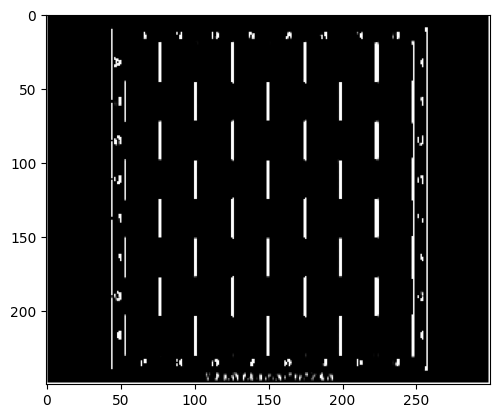

In [69]:
result = conv(gray_img, sobelX)
plt.imshow(result)
result.shape

(250, 300)

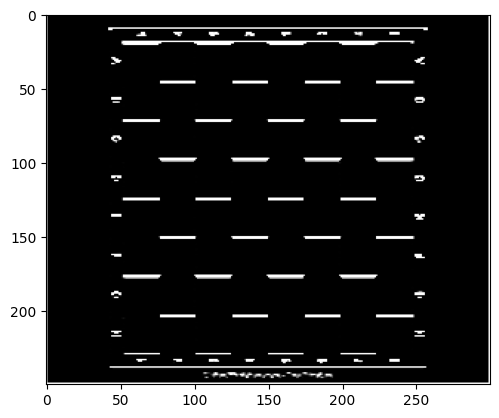

In [70]:
result = conv(gray_img, sobelY)
plt.imshow(result)
result.shape